# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 71711.05 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 98007.27 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 118214.74 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 136402.03 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142275.82 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 149536.18 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 118371.74 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 75731.54 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 108893.15 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 126836.59 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 136675.91 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 135255.70 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 121010.95 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.98 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.40 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.84 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.36 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.74 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.33 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.22 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.58 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 33.50 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.78 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.20 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.21 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.81 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.25 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.98 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.82 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.65 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.16 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.15 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.90 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.38 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.59 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.52 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.48 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.11 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 44.87 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.51 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 37.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.80 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.60 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.42 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.55 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.06 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.36 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.61 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.04 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 33.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.94 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.17 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.16 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.50 examples/s]

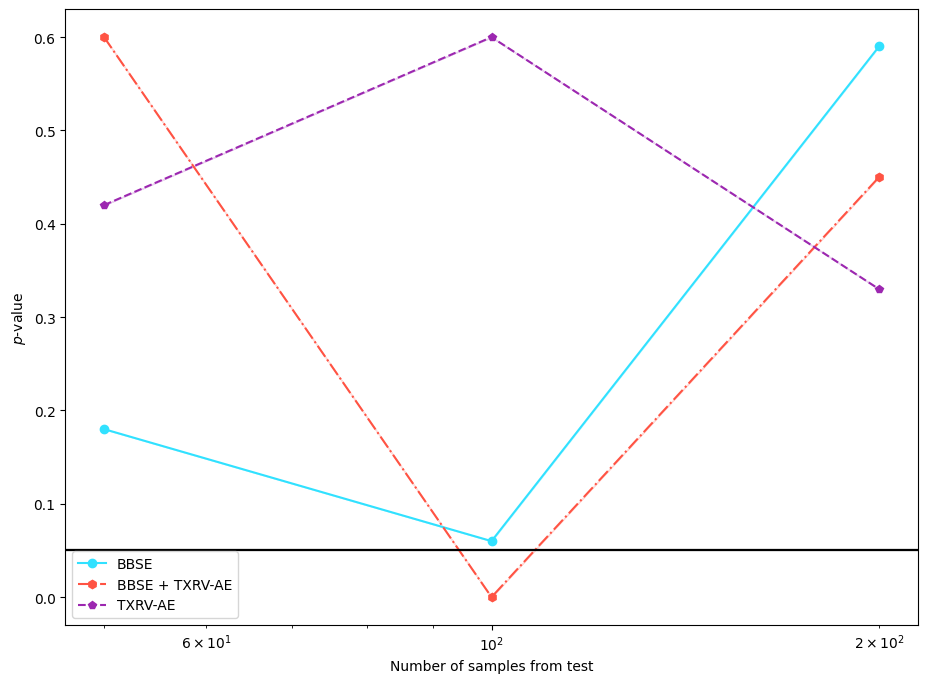

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.70 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.27 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.12 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.95 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.86 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.25 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.36 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.42 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 32.89 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.98 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.02 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.55 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.20 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.47 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.46 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.57 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.14 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.24 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 19.22 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.30 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.42 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.41 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.91 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.96 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.47 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.59 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.32 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.59 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.83 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.39 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.15 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 14.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.21 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.76 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.91 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.09 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.21 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.28 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.32 examples/s]

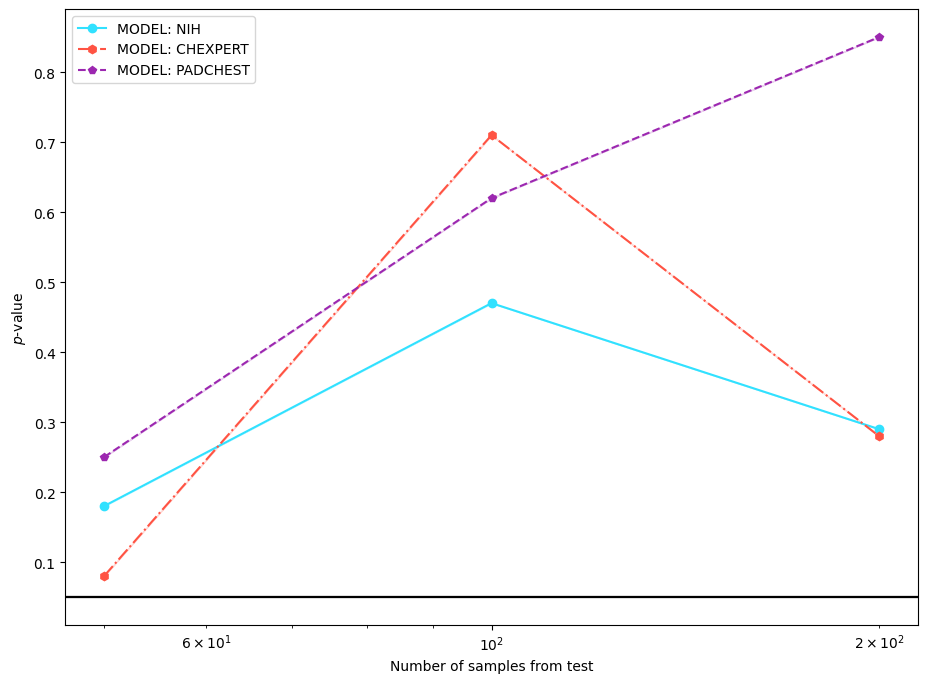

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55373.29 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80950.54 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 94659.65 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 103099.23 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 104689.61 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109811.13 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 88096.12 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50986.41 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73186.01 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82941.90 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91209.04 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99462.99 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109138.86 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 83284.53 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.74 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.60 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.79 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 50.05 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 55.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 47.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.76 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.63 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.22 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 32.37 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.97 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.32 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.71 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.62 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.91 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56819.98 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80863.16 examples/s]

Filter (num_proc=6):  48%|████▊     | 53374/112120 [00:00<00:00, 83899.93 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 104418.86 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108777.39 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111996.11 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 88128.05 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49910.82 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78410.46 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92412.30 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100550.88 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 105699.01 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110916.02 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 86240.51 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.13 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.99 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.92 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.77 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.60 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.80 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.74 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.50 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.26 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.78 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.62 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.65 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.50 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.99 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.95 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.17 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49775.29 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74219.35 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84934.24 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93828.46 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95870.17 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 99859.05 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 79390.83 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48146.16 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71128.21 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84650.03 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90341.66 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98110.41 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101450.83 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 79724.10 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.36 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.73 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.65 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.39 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.34 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.23 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.61 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.14 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.80 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.18 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.81 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52385.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76557.67 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 90628.07 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 102012.80 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 106492.50 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110961.52 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 86894.96 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56459.92 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 80643.32 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93789.40 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101216.05 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 105662.84 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109142.71 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 87449.40 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.92 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.08 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.90 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.72 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.11 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.44 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.80 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.52 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.54 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.00 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.38 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.53 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.36 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.82 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.14 examples/s]

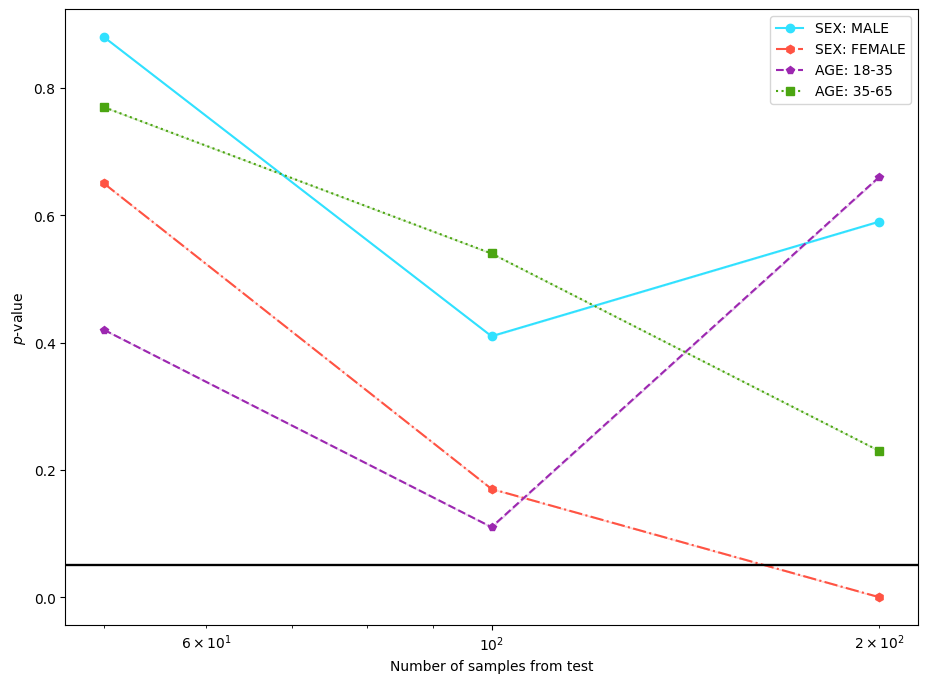

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.99 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.55 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.22 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.11 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.11 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.40 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.12 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.69 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.56 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.20 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.43 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.96 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.23 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.44 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.98 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.19 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.56 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.17 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.63 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.03 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.42 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.22 examples/s]

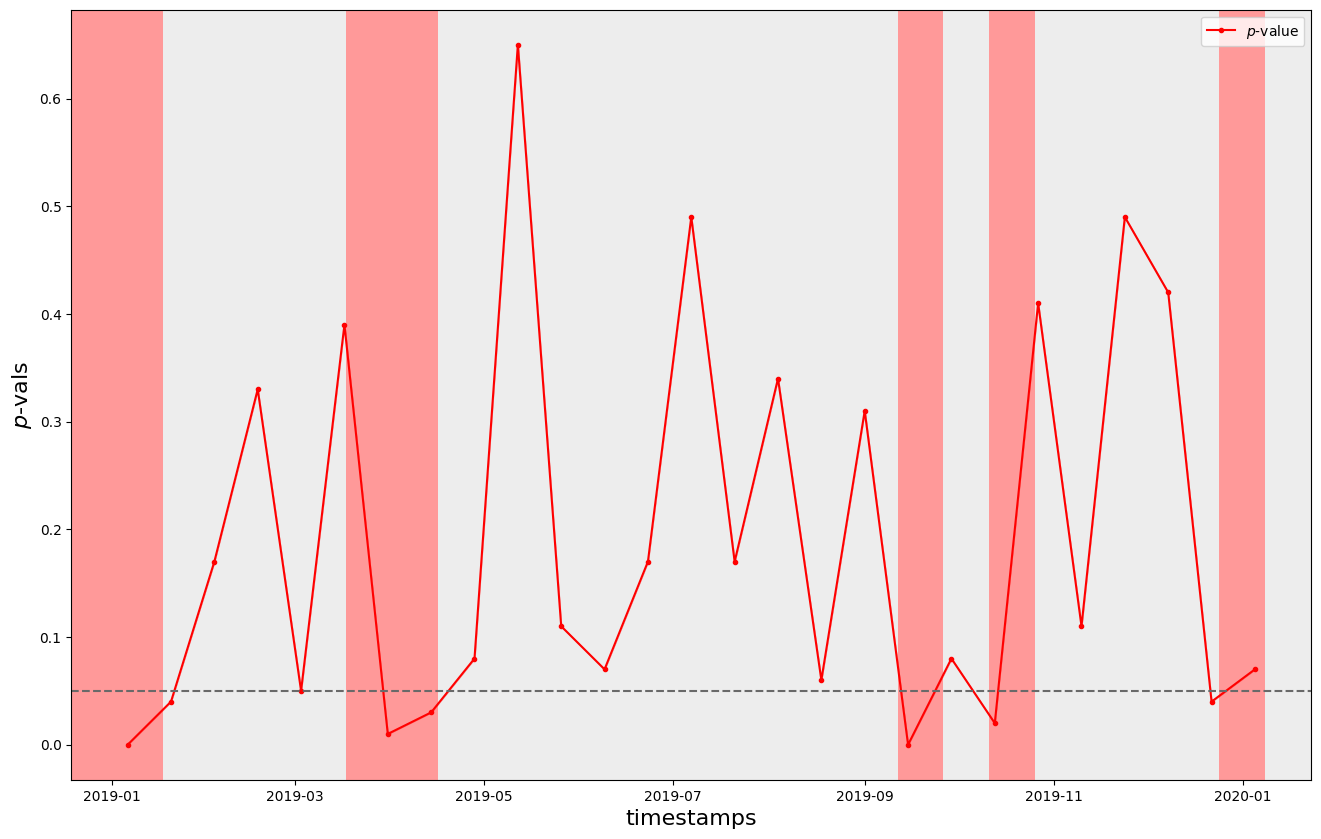

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)